# Establishing Dataset
In this this notebook the moral machine dataset(https://osf.io/wt6mc) will be used, explored and manipulated for the relevant rq.

**Libraries and Packages**

Loading in the relevant packages and libraries. 

In [9]:
#Importing relevant packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**Loading in the Dataset**

Loading in the dataset in chunks because of the ample size of the original dataset. To answer the rq, only african countries are relevant. The dataset is being loaded in chunks and filtered by african countries by their iso code. 


In [10]:
# Making an object with all african countries
african_countries = { "DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CMR", "CPV", 
                       "CAF", "TCD", "COM", "COD", "DJI", "EGY", "GNQ", "ERI", 
                       "SWZ", "ETH", "GAB", "GMB", "GHA", "GIN", "GNB", "CIV", 
                       "KEN", "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", 
                       "MUS", "MYT", "MAR", "MOZ", "NAM", "NER", "NGA", "STP", 
                       "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TZA", 
                       "TGO", "TUN", "UGA", "COD", "ZMB", "ZWE" }

african_countries_list = list(african_countries)

convert_alpha3_codes = {
    'Algeria': 'DZA',
    'Angola': 'AGO',
    'Benin': 'BEN',
    'Botswana': 'BWA',
    'Burkina Faso': 'BFA',
    'Burundi': 'BDI',
    'Cabo Verde': 'CPV',
    'Cameroon': 'CMR',
    'Central African Republic': 'CAF',
    'Chad': 'TCD',
    'Comoros': 'COM',
    'Democratic Republic of the Congo': 'COD',
    'Republic of the Congo': 'COG',
    'Djibouti': 'DJI',
    'Egypt': 'EGY',
    'Equatorial Guinea': 'GNQ',
    'Eswatini': 'SWZ',
    'Ethiopia': 'ETH',
    'Gabon': 'GAB',
    'Gambia': 'GMB',
    'Ghana': 'GHA',
    'Guinea': 'GIN',
    'Guinea-Bissau': 'GNB',
    'Ivory Coast': 'CIV',
    'Kenya': 'KEN',
    'Lesotho': 'LSO',
    'Liberia': 'LBR',
    'Libya': 'LBY',
    'Madagascar': 'MDG',
    'Malawi': 'MWI',
    'Mali': 'MLI',
    'Mauritania': 'MRT',
    'Mauritius': 'MUS',
    'Morocco': 'MAR',
    'Mozambique': 'MOZ',
    'Namibia': 'NAM',
    'Niger': 'NER',
    'Nigeria': 'NGA',
    'Rwanda': 'RWA',
    'Sao Tome and Principe': 'STP',
    'Senegal': 'SEN',
    'Seychelles': 'SYC',
    'Sierra Leone': 'SLE',
    'Somalia': 'SOM',
    'South Africa': 'ZAF',
    'South Sudan': 'SSD',
    'Sudan': 'SDN',
    'Tanzania': 'TZA',
    'Togo': 'TGO',
    'Tunisia': 'TUN',
    'Uganda': 'UGA',
    'Zambia': 'ZMB',
    'Zimbabwe': 'ZWE'}

# File path to dataset
file_path = 'SharedResponses.csv'

# Chunk size
chunk_size = 100000 

# Empty list to store filtered chunks
filtered_chunks = []

# Going over the dataset in chunks filtering on the african countries object
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    filtered_chunk = chunk[chunk['UserCountry3'].isin(african_countries_list)] # Filtering criteria
    filtered_chunks.append(filtered_chunk)  # Filtered chunk to the list

# Put all filtered chunks into a single DataFrame
filtered_data = pd.concat(filtered_chunks)

# Saving the filtered dataset into a new file
filtered_data.to_csv('3african_countries_dataset.csv', index=False)

# Loading in our new dataset 
file_path = '3african_countries_dataset.csv'
data = pd.read_csv(file_path)
print(data) # See if it looks like how it is needed 

/var/folders/02/df_z1_3s09bds371rwzhjd1m0000gn/T/ipykernel_1100/3339912257.py:77: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/02/df_z1_3s09bds371rwzhjd1m0000gn/T/ipykernel_1100/3339912257.py:77: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/02/df_z1_3s09bds371rwzhjd1m0000gn/T/ipykernel_1100/3339912257.py:77: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/02/df_z1_3s09bds371rwzhjd1m0000gn/T/ipykernel_1100/3339912257.py:77: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, chunksize=chunk_size):
/var/folders/02/df_z1_3s

               ResponseID               ExtendedSessionID        UserID  \
0       2228EQY3XnmTh3dq8   -1700464608_947225429117679.0  9.472254e+14   
1       223f9f3svbuqQbf4L    -10888341_2648332901299000.0  2.648333e+15   
2       224EWe4h872zLztpH   1278829834_1459202088246669.0  1.459202e+15   
3       224J5NGdAiqaxB9eq   2115918316_9585357987295466.0  9.585358e+15   
4       226imw4Wp9seGBry5   1387373175_4350714793164412.0  4.350715e+15   
...                   ...                             ...           ...   
342076  zzwKRaYSXMSGnbuDu           2018397892_1296421467  1.296421e+09   
342077  zzxmNRfP4WQJgFCWY  -2127700541_7773879126130039.0  7.773879e+15   
342078  zzyCnJZesG8XuFr5c    813003528_9732181120531538.0  9.732181e+15   
342079  zzz4GfcJ4AcqZNSfG         -194191917_2203494287.0  2.203494e+09   
342080  zzznqmAu2uE9SYm3d    397225291_9465514998451634.0  9.465515e+15   

        ScenarioOrder  Intervention  PedPed  Barrier  CrossingSignal  \
0                   7      

The African continent is generally less represented in the original dataset. A few simple analysis are done to be able to check the representation and the size of the new dataset. 

In [3]:
#Checking if my new dataset is smaller, but big enough
num_rows = len(data)
print("Number of rows in the dataset:", num_rows) #342081 rows

pd.set_option('display.max_columns', None)
print(data)

# Getting unique countries 
unique_countries = data['UserCountry3'].unique()

for country in unique_countries:
    print(country)

# Representation of countries

# African countries
all_african_countries = ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CMR", "CPV", 
                         "CAF", "TCD", "COM", "COD", "DJI", "EGY", "GNQ", "ERI", 
                         "SWZ", "ETH", "GAB", "GMB", "GHA", "GIN", "GNB", "CIV", 
                         "KEN", "LSO", "LBR", "LBY", "MDG", "MWI", "MLI", "MRT", 
                         "MUS", "MYT", "MAR", "MOZ", "NAM", "NER", "NGA", "STP", 
                         "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TZA", 
                         "TGO", "TUN", "UGA", "COD", "ZMB", "ZWE"]

# Unique countries in my dataset
countries_in_dataset = ["EGY", "ZAF", "MAR", "DZA", "NGA", "TUN", "TZA", "SDN", "KEN", "MUS", "AGO", 
                         "DJI", "SEN", "BFA", "GHA", "CPV", "MDG", "LBR", "NAM", "ETH", "ZMB", "LBY", 
                         "GAB", "MOZ", "MWI", "MYT", "CMR", "TGO", "ZWE", "BWA", "CIV", "COD", "SOM", 
                         "UGA", "GIN", "SYC", "MRT", "BDI", "SLE", "SSD", "BEN", "LSO", "GNB", "STP", 
                         "MLI", "NER", "CAF", "GMB", "SWZ", "COM", "GNQ", "TCD"] # The result of the unique_countries object 

# Convert lists to sets for efficient comparison
all_african_countries_set = set(all_african_countries)
countries_in_dataset_set = set(countries_in_dataset)

# Finding countries not represented in the dataset
countries_not_in_dataset = all_african_countries_set - countries_in_dataset_set

# Print countries not represented in the dataset #the only country not represented is ERI (eritrea)
print("Countries not represented in the dataset:")
for country in countries_not_in_dataset:
    print(country)

# Seeing the most frequent country and least frequent country 
country_counts = data['UserCountry3'].value_counts()

# Most frequent country and its count
most_frequent_country = country_counts.idxmax()
most_frequent_count = country_counts.max()

# The least frequent country and its count
least_frequent_country = country_counts.idxmin()
least_frequent_count = country_counts.min()

print("Most frequent country is ", most_frequent_country, "with amount rows:", most_frequent_count) #ZAF with 134069
print("Least frequent country is", least_frequent_country, "with amount rows", least_frequent_count) #CAF with 22

# Top frequent countries
top_freq_countries = data['UserCountry3'].value_counts().head(10)

print("Top 10 countries with their row counts:")
print(top_freq_countries)


Number of rows in the dataset: 342081
               ResponseID               ExtendedSessionID        UserID  \
0       2228EQY3XnmTh3dq8   -1700464608_947225429117679.0  9.472254e+14   
1       223f9f3svbuqQbf4L    -10888341_2648332901299000.0  2.648333e+15   
2       224EWe4h872zLztpH   1278829834_1459202088246669.0  1.459202e+15   
3       224J5NGdAiqaxB9eq   2115918316_9585357987295466.0  9.585358e+15   
4       226imw4Wp9seGBry5   1387373175_4350714793164412.0  4.350715e+15   
...                   ...                             ...           ...   
342076  zzwKRaYSXMSGnbuDu           2018397892_1296421467  1.296421e+09   
342077  zzxmNRfP4WQJgFCWY  -2127700541_7773879126130039.0  7.773879e+15   
342078  zzyCnJZesG8XuFr5c    813003528_9732181120531538.0  9.732181e+15   
342079  zzz4GfcJ4AcqZNSfG         -194191917_2203494287.0  2.203494e+09   
342080  zzznqmAu2uE9SYm3d    397225291_9465514998451634.0  9.465515e+15   

        ScenarioOrder  Intervention  PedPed  Barrier  Crossin

Due to the relevant large difference between the most and least frequent country, the countries are again organized on region for a more balanced representation. 

In [11]:
# Countries per region 
central_africa = ['BDI', 'CMR', 'CAF', 'TCD', 'COG', 'COD', 'GNQ', 'GAB', 'STP']

eastern_africa = ['COM', 'DJI', 'ERI', 'ETH', 'KEN', 'MDG', 'MUS', 'RWA', 'SYC', 'SOM', 'SSD', 'SDN', 'TZA', 'UGA']

northern_africa = ['DZA', 'EGY', 'LBY', 'MRT', 'MAR', 'ESH', 'TUN']

southern_africa = ['AGO', 'BWA', 'SWZ', 'LSO', 'MWI', 'MOZ', 'NAM', 'ZAF', 'ZMB', 'ZWE']

western_africa = ['BEN', 'BFA', 'CPV', 'CIV', 'GMB', 'GHA', 'GIN', 'GNB', 'LBR', 'MLI', 'NER', 'NGA', 'SEN', 'SLE', 'TGO']

# Subset of the dataset on region for later reference
C_data = data[data['UserCountry3'].isin(central_africa)]
E_data = data[data['UserCountry3'].isin(eastern_africa)]
N_data = data[data['UserCountry3'].isin(northern_africa)]
S_data = data[data['UserCountry3'].isin(southern_africa)]
W_data = data[data['UserCountry3'].isin(western_africa)]

# Adding the regions as a column on the dataset 
# Defining regions based on earlier made objects
regions = {
    'central': central_africa,
    'eastern': eastern_africa,
    'western': western_africa,
    'northern': northern_africa,
    'southern': southern_africa}

# Function to assign region based on country
def add_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return None

# Add 'RegionAU' column to dataset 
data['RegionAU'] = data['UserCountry3'].apply(add_region)

data_regions = data
print(data_regions) # See if the dataset looks like needed 

               ResponseID               ExtendedSessionID        UserID  \
0       2228EQY3XnmTh3dq8   -1700464608_947225429117679.0  9.472254e+14   
1       223f9f3svbuqQbf4L    -10888341_2648332901299000.0  2.648333e+15   
2       224EWe4h872zLztpH   1278829834_1459202088246669.0  1.459202e+15   
3       224J5NGdAiqaxB9eq   2115918316_9585357987295466.0  9.585358e+15   
4       226imw4Wp9seGBry5   1387373175_4350714793164412.0  4.350715e+15   
...                   ...                             ...           ...   
342076  zzwKRaYSXMSGnbuDu           2018397892_1296421467  1.296421e+09   
342077  zzxmNRfP4WQJgFCWY  -2127700541_7773879126130039.0  7.773879e+15   
342078  zzyCnJZesG8XuFr5c    813003528_9732181120531538.0  9.732181e+15   
342079  zzz4GfcJ4AcqZNSfG         -194191917_2203494287.0  2.203494e+09   
342080  zzznqmAu2uE9SYm3d    397225291_9465514998451634.0  9.465515e+15   

        ScenarioOrder  Intervention  PedPed  Barrier  CrossingSignal  \
0                   7      

Each scenario is represented by two rows in the data, each row is one of the two outcomes and represented by ResponseID. To make sure only complete scenario's are in this dataset, only duplicates of ResponseID is kept. The dataset is then split into scenario's with the set of characters that were saved and killed for some EDA. 
This specific code block is taken over from StackOverflow

In [12]:
# Filtering duplicates based on ResponseID
data_regions_dup = data_regions[data.duplicated(subset='ResponseID', keep=False)]

# Sorting duplicates based on ResponseID
data_regions_dup = data_regions_dup.sort_values(by='ResponseID')

# Splitting into two dataframes: one with survivors, one with dead
data_regions_saved= data_regions_dup[data_regions_dup['Saved'] == 1]
data_regions_killed = data_regions_dup[data_regions_dup['Saved'] == 0]

print ("This is saved", data_regions_saved) #165133 rows
print ("This is killed", data_regions_killed) # 165133 rows 
print (data_regions_saved.columns)
print (data_regions_killed.columns)


This is saved                ResponseID               ExtendedSessionID        UserID  \
0       2228EQY3XnmTh3dq8   -1700464608_947225429117679.0  9.472254e+14   
43239   224EWe4h872zLztpH   1278829834_1459202088246669.0  1.459202e+15   
3       224J5NGdAiqaxB9eq   2115918316_9585357987295466.0  9.585358e+15   
5       226nFt3948FLPAQEy   2039602304_6502144349992827.0  6.502144e+15   
43242   228Eu8wgzdQp2HWCB         1320152503_3597243509.0  3.597244e+09   
...                   ...                             ...           ...   
342076  zzwKRaYSXMSGnbuDu           2018397892_1296421467  1.296421e+09   
342077  zzxmNRfP4WQJgFCWY  -2127700541_7773879126130039.0  7.773879e+15   
342078  zzyCnJZesG8XuFr5c    813003528_9732181120531538.0  9.732181e+15   
342079  zzz4GfcJ4AcqZNSfG         -194191917_2203494287.0  2.203494e+09   
342080  zzznqmAu2uE9SYm3d    397225291_9465514998451634.0  9.465515e+15   

        ScenarioOrder  Intervention  PedPed  Barrier  CrossingSignal  \
0            

**EDA og Characters and added Characters** 

Total Appearances in 'saved' dataframe:
Man: 54888.0
Woman: 57215.0
Pregnant: 13702.0
Stroller: 13404.0
OldMan: 26252.0
OldWoman: 27544.0
Boy: 35576.0
Girl: 37306.0
Homeless: 14579.0
LargeWoman: 28999.0
LargeMan: 27092.0
Criminal: 12077.0
MaleExecutive: 19003.0
FemaleExecutive: 21090.0
FemaleAthlete: 39265.0
MaleAthlete: 36662.0
FemaleDoctor: 20315.0
MaleDoctor: 18679.0
Dog: 17223.0
Cat: 16944.0

Total Appearances in 'killed' dataframe:
Man: 46298.0
Woman: 44171.0
Pregnant: 7019.0
Stroller: 6789.0
OldMan: 39468.0
OldWoman: 38005.0
Boy: 19188.0
Girl: 17055.0
Homeless: 10431.0
LargeWoman: 25463.0
LargeMan: 27607.0
Criminal: 8386.0
MaleExecutive: 14877.0
FemaleExecutive: 13099.0
FemaleAthlete: 26397.0
MaleAthlete: 28210.0
FemaleDoctor: 12525.0
MaleDoctor: 14154.0
Dog: 42019.0
Cat: 42381.0

Total Appearances in combined dataframe:
Man: 101186.0
Woman: 101386.0
Pregnant: 20721.0
Stroller: 20193.0
OldMan: 65720.0
OldWoman: 65549.0
Boy: 54764.0
Girl: 54361.0
Homeless: 25010.0
LargeWoman: 5446

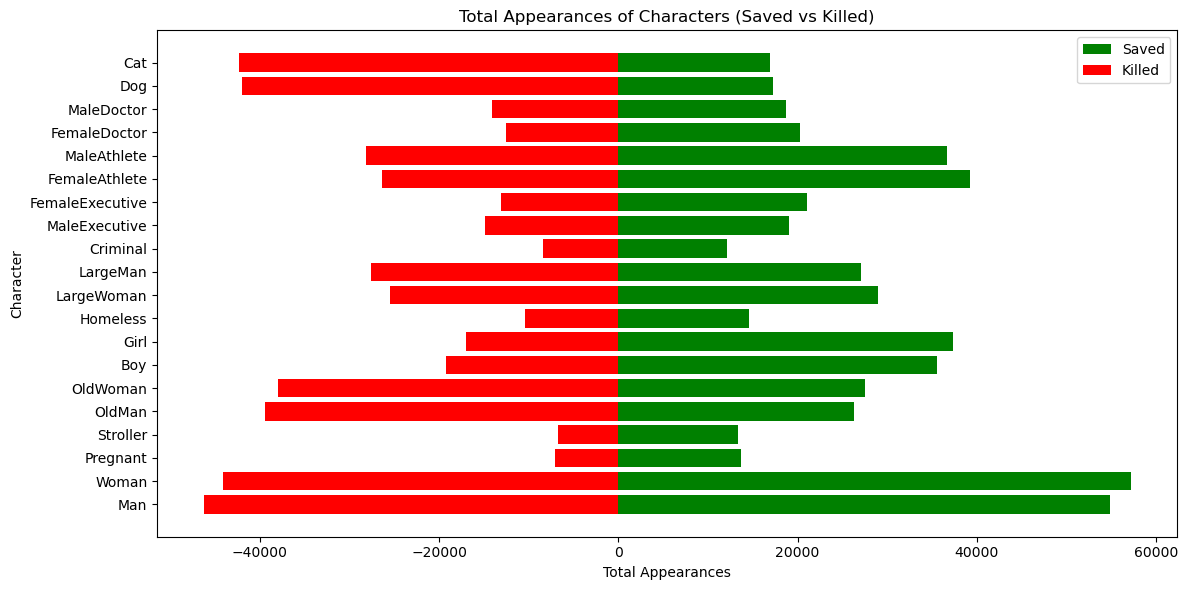

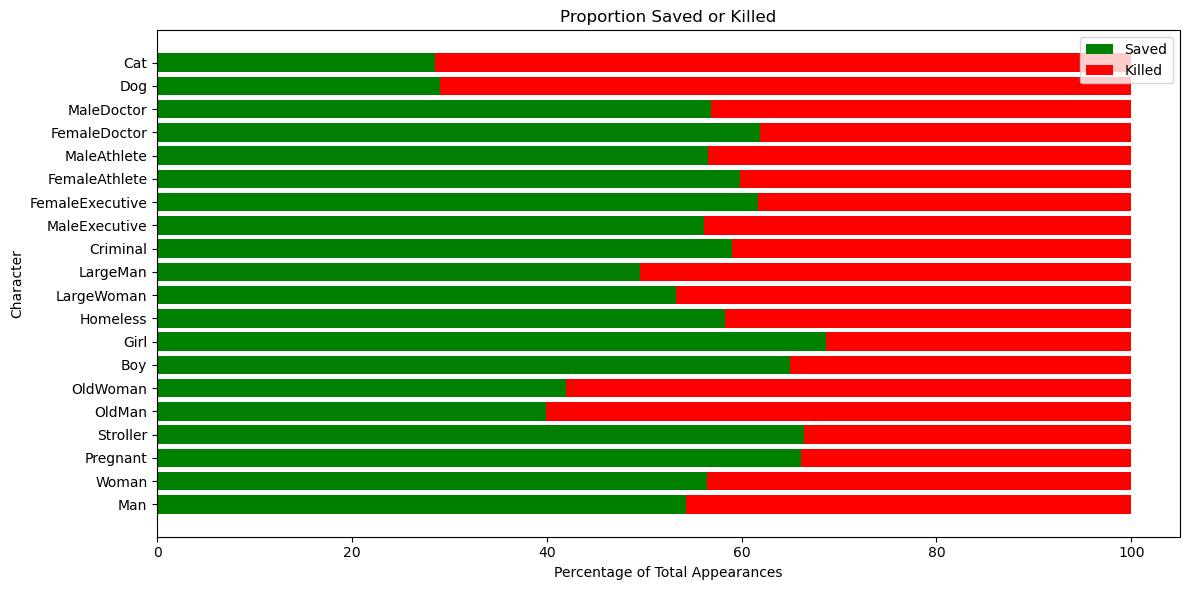

In [6]:
# Summary statistics per character
# Define a list of characters
characters = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 
              'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 
              'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

# Initialize dictionaries to store character appearances
total_appearances_saved = {}
total_appearances_killed = {}
total_appearances_combined = {}

# Calculate total appearances in 'saved' dataframe
for character in characters:
    total_appearances_saved[character] = data_regions_saved[character].sum()

# Calculate total appearances in 'killed' dataframe
for character in characters:
    total_appearances_killed[character] = data_regions_killed[character].sum()

# Calculate total appearances in combined dataframe
for character in characters:
    total_appearances_combined[character] = total_appearances_saved[character] + total_appearances_killed[character]

# Print results for 'saved' dataframe
print("Total Appearances in 'saved' dataframe:")
for character, appearances in total_appearances_saved.items():
    print(f"{character}: {appearances}")

# Print results for 'killed' dataframe
print("\nTotal Appearances in 'killed' dataframe:")
for character, appearances in total_appearances_killed.items():
    print(f"{character}: {appearances}")

# Print results for combined dataframe
print("\nTotal Appearances in combined dataframe:")
for character, appearances in total_appearances_combined.items():
    print(f"{character}: {appearances}")
    
# Plotting
plt.figure(figsize=(12, 6))

# Plot bars for saved
plt.barh(characters, [total_appearances_saved[character] for character in characters], color='green', label='Saved')

# Plot bars for killed
plt.barh(characters, [-total_appearances_killed[character] for character in characters], color='red', label='Killed')

# Adding labels and title
plt.xlabel('Total Appearances')
plt.ylabel('Character')
plt.title('Total Appearances of Characters (Saved vs Killed)')
plt.legend()

# Show plot total 
plt.tight_layout()
plt.show()


# Plotting Characters Proportions
# Calculate the total combined appearances per character
total_appearances_combined = {character: total_appearances_saved[character] + total_appearances_killed[character] for character in characters}

# Calculate the percentage of times killed and saved per character
percentage_saved = {character: (total_appearances_saved[character] / total_appearances_combined[character]) * 100 for character in characters}
percentage_killed = {character: (total_appearances_killed[character] / total_appearances_combined[character]) * 100 for character in characters}

# Plotting
plt.figure(figsize=(12, 6))

# Plot bars for saved percentage
plt.barh(characters, [percentage_saved[character] for character in characters], color='green', label='Saved')

# Plot bars for killed percentage
plt.barh(characters, [percentage_killed[character] for character in characters], color='red', label='Killed', left=[percentage_saved[character] for character in characters])

# Adding labels and title
plt.xlabel('Percentage of Total Appearances')
plt.ylabel('Character')
plt.title('Proportion Saved or Killed')
plt.legend()

# Show plotn proportions
plt.tight_layout()
plt.show()


In [7]:
# Feature engineering saved
# Create a new DataFrame for feature engineering
new_data_saved = data_regions_saved.copy()

# Define mapping for feature engineering for 'saved' DataFrame
feature_mapping_saved = {
    'Man': 'Adult',
    'Woman': 'Adult',
    'Pregnant': 'Pregnant_2',
    'Stroller': 'Stroller_2',
    'OldMan': 'Elderly',
    'OldWoman': 'Elderly',
    'Boy': 'Child',
    'Girl': 'Child',
    'Homeless': 'Homeless_2',
    'LargeWoman': 'Larger Adult',
    'LargeMan': 'Larger Adult',
    'Criminal': 'Criminal_2',
    'MaleExecutive': 'Executive',
    'FemaleExecutive': 'Executive',
    'FemaleAthlete': 'Fit Adult',
    'MaleAthlete': 'Fit Adult',
    'FemaleDoctor': 'Doctor',
    'MaleDoctor': 'Doctor',
    'Dog': 'Animal',
    'Cat': 'Animal'
}

# Perform feature engineering for 'saved' DataFrame
for character, category in feature_mapping_saved.items():
    new_data_saved[category] = new_data_saved[character]


new_data_saved['Adult'] = new_data_saved['Man'] + new_data_saved['Woman']
new_data_saved['Child'] = new_data_saved['Boy'] + new_data_saved['Girl']
new_data_saved['Homeless_2'] = new_data_saved['Homeless']
new_data_saved['Larger Adult'] = new_data_saved['LargeWoman'] + new_data_saved['LargeMan']
new_data_saved['Criminal_2'] = new_data_saved['Criminal']
new_data_saved['Executive'] = new_data_saved['MaleExecutive'] + new_data_saved['FemaleExecutive']
new_data_saved['Fit Adult'] = new_data_saved['MaleAthlete'] + new_data_saved['FemaleAthlete']
new_data_saved['Doctor'] = new_data_saved['MaleDoctor'] + new_data_saved['FemaleDoctor']
new_data_saved['Animal'] = new_data_saved['Dog'] + new_data_saved['Cat']

#Drop original characters
new_data_saved.drop(columns=list(feature_mapping_saved.keys()), inplace=True)

# Display the modified DataFrame for 'saved' DataFrame
print ('Saved', data_regions_saved)
print('New_Saved', new_data_saved.head())



Saved                ResponseID               ExtendedSessionID        UserID  \
0       2228EQY3XnmTh3dq8   -1700464608_947225429117679.0  9.472254e+14   
43239   224EWe4h872zLztpH   1278829834_1459202088246669.0  1.459202e+15   
3       224J5NGdAiqaxB9eq   2115918316_9585357987295466.0  9.585358e+15   
5       226nFt3948FLPAQEy   2039602304_6502144349992827.0  6.502144e+15   
43242   228Eu8wgzdQp2HWCB         1320152503_3597243509.0  3.597244e+09   
...                   ...                             ...           ...   
342076  zzwKRaYSXMSGnbuDu           2018397892_1296421467  1.296421e+09   
342077  zzxmNRfP4WQJgFCWY  -2127700541_7773879126130039.0  7.773879e+15   
342078  zzyCnJZesG8XuFr5c    813003528_9732181120531538.0  9.732181e+15   
342079  zzz4GfcJ4AcqZNSfG         -194191917_2203494287.0  2.203494e+09   
342080  zzznqmAu2uE9SYm3d    397225291_9465514998451634.0  9.465515e+15   

        ScenarioOrder  Intervention  PedPed  Barrier  CrossingSignal  \
0                   7

In [8]:
# Feature Engineering Killed
# Create a new DataFrame for feature engineering
new_data_killed = data_regions_killed.copy()

# Define mapping for feature engineering for 'saved' DataFrame
feature_mapping_killed = {
    'Man': 'Adult',
    'Woman': 'Adult',
    'Pregnant': 'Pregnant_2',
    'Stroller': 'Stroller_2',
    'OldMan': 'Elderly',
    'OldWoman': 'Elderly',
    'Boy': 'Child',
    'Girl': 'Child',
    'Homeless': 'Homeless_2',
    'LargeWoman': 'Larger Adult',
    'LargeMan': 'Larger Adult',
    'Criminal': 'Criminal_2',
    'MaleExecutive': 'Executive',
    'FemaleExecutive': 'Executive',
    'FemaleAthlete': 'Fit Adult',
    'MaleAthlete': 'Fit Adult',
    'FemaleDoctor': 'Doctor',
    'MaleDoctor': 'Doctor',
    'Dog': 'Animal',
    'Cat': 'Animal'}

# Feature engineering for 'saved' DataFrame
for character, category in feature_mapping_killed.items():
    new_data_killed[category] = new_data_killed[character]

new_data_killed['Adult'] = new_data_killed['Man'] + new_data_killed['Woman']
new_data_killed['Child'] = new_data_killed['Boy'] + new_data_killed['Girl']
new_data_killed['Homeless_2'] = new_data_killed['Homeless']
new_data_killed['Larger Adult'] = new_data_killed['LargeWoman'] + new_data_killed['LargeMan']
new_data_killed['Criminal_2'] = new_data_killed['Criminal']
new_data_killed['Executive'] = new_data_killed['MaleExecutive'] + new_data_killed['FemaleExecutive']
new_data_killed['Fit Adult'] = new_data_killed['MaleAthlete'] + new_data_killed['FemaleAthlete']
new_data_killed['Doctor'] = new_data_killed['MaleDoctor'] + new_data_killed['FemaleDoctor']
new_data_killed['Animal'] = new_data_killed['Dog'] + new_data_killed['Cat']

#Drop original characters
new_data_killed.drop(columns=list(feature_mapping_killed.keys()), inplace=True)

# Display the modified DataFrame for 'saved' DataFrame
print ('Killed', data_regions_killed)
print('New_Killed', new_data_killed.head())



Killed                ResponseID               ExtendedSessionID        UserID  \
43238   2228EQY3XnmTh3dq8   -1700464608_947225429117679.0  9.472254e+14   
2       224EWe4h872zLztpH   1278829834_1459202088246669.0  1.459202e+15   
43240   224J5NGdAiqaxB9eq   2115918316_9585357987295466.0  9.585358e+15   
43241   226nFt3948FLPAQEy   2039602304_6502144349992827.0  6.502144e+15   
6       228Eu8wgzdQp2HWCB         1320152503_3597243509.0  3.597244e+09   
...                   ...                             ...           ...   
300729  zzwKRaYSXMSGnbuDu           2018397892_1296421467  1.296421e+09   
300730  zzxmNRfP4WQJgFCWY  -2127700541_7773879126130039.0  7.773879e+15   
300731  zzyCnJZesG8XuFr5c    813003528_9732181120531538.0  9.732181e+15   
300732  zzz4GfcJ4AcqZNSfG         -194191917_2203494287.0  2.203494e+09   
300733  zzznqmAu2uE9SYm3d    397225291_9465514998451634.0  9.465515e+15   

        ScenarioOrder  Intervention  PedPed  Barrier  CrossingSignal  \
43238               

Total Appearances in 'saved' dataframe:
Adult: 112103.0
Pregnant_2: 13702.0
Stroller_2: 13404.0
Elderly: 27544.0
Child: 72882.0
Homeless_2: 14579.0
Larger Adult: 56091.0
Criminal_2: 12077.0
Executive: 40093.0
Fit Adult: 75927.0
Doctor: 38994.0
Animal: 34167.0

Total Appearances in 'killed' dataframe:
Adult: 90469.0
Pregnant_2: 7019.0
Stroller_2: 6789.0
Elderly: 38005.0
Child: 36243.0
Homeless_2: 10431.0
Larger Adult: 53070.0
Criminal_2: 8386.0
Executive: 27976.0
Fit Adult: 54607.0
Doctor: 26679.0
Animal: 84400.0

Total Appearances in combined dataframe:
Adult: 202572.0
Pregnant_2: 20721.0
Stroller_2: 20193.0
Elderly: 65549.0
Child: 109125.0
Homeless_2: 25010.0
Larger Adult: 109161.0
Criminal_2: 20463.0
Executive: 68069.0
Fit Adult: 130534.0
Doctor: 65673.0
Animal: 118567.0


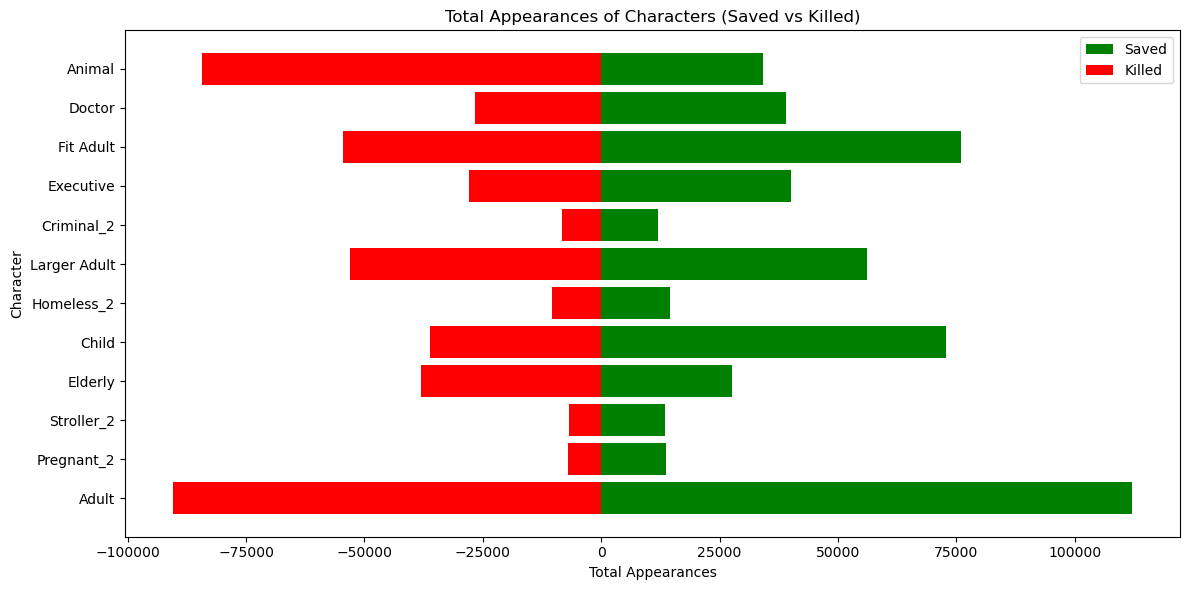

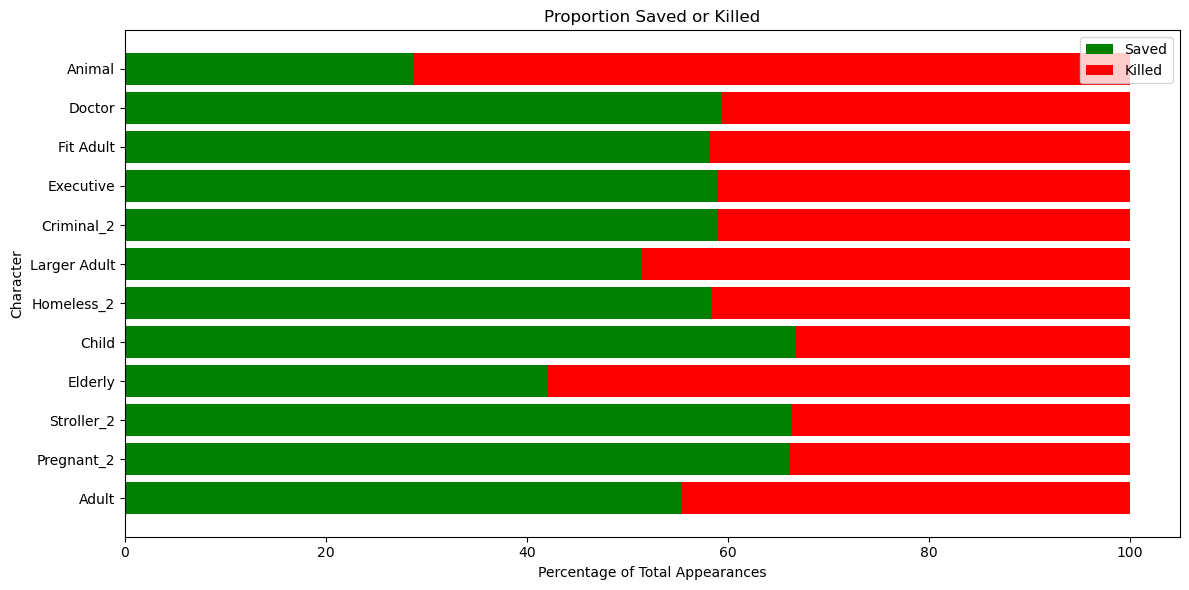

In [9]:
# Plotting New Features
# Summary statistics per new character
# Defining  list of characters
characters = ['Adult', 'Pregnant_2', 'Stroller_2', 'Elderly', 'Child', 'Homeless_2', 'Larger Adult', 'Criminal_2', 'Executive', 'Fit Adult', 'Doctor', 'Animal']

# Initialize dictionaries to store character appearances
new_total_appearances_saved = {}
new_total_appearances_killed = {}
new_total_appearances_combined = {}

# Calculate total appearances in 'saved' dataframe
for character in characters:
    new_total_appearances_saved[character] = new_data_saved[character].sum()

# Calculate total appearances in 'killed' dataframe
for character in characters:
    new_total_appearances_killed[character] = new_data_killed[character].sum()

# Calculate total appearances in combined dataframe
for character in characters:
    new_total_appearances_combined[character] = new_total_appearances_saved[character] + new_total_appearances_killed[character]

# Print results for 'saved' dataframe
print("Total Appearances in 'saved' dataframe:")
for character, appearances in new_total_appearances_saved.items():
    print(f"{character}: {appearances}")

# Print results for 'killed' dataframe
print("\nTotal Appearances in 'killed' dataframe:")
for character, appearances in new_total_appearances_killed.items():
    print(f"{character}: {appearances}")

# Print results for combined dataframe
print("\nTotal Appearances in combined dataframe:")
for character, appearances in new_total_appearances_combined.items():
    print(f"{character}: {appearances}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot bars for saved
plt.barh(characters, [new_total_appearances_saved[character] for character in characters], color='green', label='Saved')

# Plot bars for killed
plt.barh(characters, [-new_total_appearances_killed[character] for character in characters], color='red', label='Killed')

# Adding labels and title
plt.xlabel('Total Appearances')
plt.ylabel('Character')
plt.title('Total Appearances of Characters (Saved vs Killed)')
plt.legend()

# Show plot total
plt.tight_layout()
plt.show()

# Calculate the percentages relative to total appearances
percentage_saved = {character: (new_total_appearances_saved[character] / new_total_appearances_combined[character]) * 100 for character in characters}
percentage_killed = {character: (new_total_appearances_killed[character] / new_total_appearances_combined[character]) * 100 for character in characters}

# Plotting Characters in percentages 
# Calculate the percentages relative to total appearances
percentage_saved = {character: (new_total_appearances_saved[character] / new_total_appearances_combined[character]) * 100 for character in characters}
percentage_killed = {character: (new_total_appearances_killed[character] / new_total_appearances_combined[character]) * 100 for character in characters}

# Plotting
plt.figure(figsize=(12, 6))

# Plot bars for saved percentage
plt.barh(characters, [percentage_saved[character] for character in characters], color='green', label='Saved')

# Plot bars for killed percentage
plt.barh(characters, [percentage_killed[character] for character in characters], color='red', label='Killed', left=[percentage_saved[character] for character in characters])

# Adding labels and title
plt.xlabel('Percentage of Total Appearances')
plt.ylabel('Character')
plt.title('Proportion Saved or Killed')
plt.legend()

# Show plot proportions
plt.tight_layout()
plt.show()





In [10]:
# Seeing how the different dataframes look like 
print ('This is saved with og features', data_regions_saved)
print ('This is killed with og features', data_regions_killed)

print ('This is saved with new features', new_data_saved)
print ('This is killed with new features', new_data_killed)


This is saved with og features                ResponseID               ExtendedSessionID        UserID  \
0       2228EQY3XnmTh3dq8   -1700464608_947225429117679.0  9.472254e+14   
43239   224EWe4h872zLztpH   1278829834_1459202088246669.0  1.459202e+15   
3       224J5NGdAiqaxB9eq   2115918316_9585357987295466.0  9.585358e+15   
5       226nFt3948FLPAQEy   2039602304_6502144349992827.0  6.502144e+15   
43242   228Eu8wgzdQp2HWCB         1320152503_3597243509.0  3.597244e+09   
...                   ...                             ...           ...   
342076  zzwKRaYSXMSGnbuDu           2018397892_1296421467  1.296421e+09   
342077  zzxmNRfP4WQJgFCWY  -2127700541_7773879126130039.0  7.773879e+15   
342078  zzyCnJZesG8XuFr5c    813003528_9732181120531538.0  9.732181e+15   
342079  zzz4GfcJ4AcqZNSfG         -194191917_2203494287.0  2.203494e+09   
342080  zzznqmAu2uE9SYm3d    397225291_9465514998451634.0  9.465515e+15   

        ScenarioOrder  Intervention  PedPed  Barrier  CrossingSignal

In [14]:
# Create a new DataFrame for feature engineering
new_data_dup = data_regions_dup.copy()

# Define mapping for feature engineering for data_regions_dup
feature_mapping_regions = {
    'Man': 'Adult',
    'Woman': 'Adult',
    'Pregnant': 'Pregnant_2',
    'Stroller': 'Stroller_2',
    'OldMan': 'Elderly',
    'OldWoman': 'Elderly',
    'Boy': 'Child',
    'Girl': 'Child',
    'Homeless': 'Homeless_2',
    'LargeWoman': 'Larger Adult',
    'LargeMan': 'Larger Adult',
    'Criminal': 'Criminal_2',
    'MaleExecutive': 'Executive',
    'FemaleExecutive': 'Executive',
    'FemaleAthlete': 'Fit Adult',
    'MaleAthlete': 'Fit Adult',
    'FemaleDoctor': 'Doctor',
    'MaleDoctor': 'Doctor',
    'Dog': 'Animal',
    'Cat': 'Animal'
}

# Perform feature engineering for 'data_regions_dup' DataFrame
for character, category in feature_mapping_regions.items():
    new_data_dup[category] = new_data_dup[character]

# Drop original character columns
new_data_dup.drop(columns=list(feature_mapping_regions.keys()), inplace=True)

# Display the framefor 'data_regions_dup'
print (new_data_dup)

print (new_data_dup.columns)


               ResponseID              ExtendedSessionID        UserID  \
0       2228EQY3XnmTh3dq8  -1700464608_947225429117679.0  9.472254e+14   
43238   2228EQY3XnmTh3dq8  -1700464608_947225429117679.0  9.472254e+14   
2       224EWe4h872zLztpH  1278829834_1459202088246669.0  1.459202e+15   
43239   224EWe4h872zLztpH  1278829834_1459202088246669.0  1.459202e+15   
3       224J5NGdAiqaxB9eq  2115918316_9585357987295466.0  9.585358e+15   
...                   ...                            ...           ...   
342078  zzyCnJZesG8XuFr5c   813003528_9732181120531538.0  9.732181e+15   
300732  zzz4GfcJ4AcqZNSfG        -194191917_2203494287.0  2.203494e+09   
342079  zzz4GfcJ4AcqZNSfG        -194191917_2203494287.0  2.203494e+09   
300733  zzznqmAu2uE9SYm3d   397225291_9465514998451634.0  9.465515e+15   
342080  zzznqmAu2uE9SYm3d   397225291_9465514998451634.0  9.465515e+15   

        ScenarioOrder  Intervention  PedPed  Barrier  CrossingSignal  \
0                   7             0    


Correlations


In [15]:
# List of binary columns
binary_columns = ['Adult', 'Pregnant_2', 'Stroller_2', 'Elderly', 'Child', 
                  'Homeless_2', 'Larger Adult', 'Criminal_2', 'Executive', 
                  'Fit Adult', 'Doctor', 'Animal']

# Drop rows with NaN values
new_data_dup_cleaned = new_data_dup.dropna(subset=binary_columns + ['Saved'])

# Replace infinite values with NaN
new_data_dup_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values again
new_data_dup_cleaned.dropna(subset=binary_columns + ['Saved'], inplace=True)

# Calculate point-biserial correlation coefficient and p-value for each binary column
for column in binary_columns:
    point_biserial_corr, p_value = stats.pointbiserialr(new_data_dup_cleaned[column], new_data_dup_cleaned['Saved'])
    print(f"Column: {column}, Point-Biserial Correlation: {point_biserial_corr}, p-value: {p_value}")
    

print ('---------------------------------------------')
print ('---------------------------------------------')

# Alternatively, you can calculate Pearson correlation coefficient
for column in binary_columns:
    pearson_corr, p_value = stats.pearsonr(new_data_dup_cleaned[column], new_data_dup_cleaned['Saved'])
    print(f"Column: {column}, Pearson Correlation: {pearson_corr}, p-value: {p_value}")


Column: Adult, Point-Biserial Correlation: 0.06667613593792165, p-value: 6.03e-322
Column: Pregnant_2, Point-Biserial Correlation: 0.07711773277181247, p-value: 0.0
Column: Stroller_2, Point-Biserial Correlation: 0.0775403782746564, p-value: 0.0
Column: Elderly, Point-Biserial Correlation: -0.05958372910380371, p-value: 2.0260412484518898e-257
Column: Child, Point-Biserial Correlation: 0.13553248901236925, p-value: 0.0
Column: Homeless_2, Point-Biserial Correlation: 0.041622210360537995, p-value: 1.4908403650174764e-126
Column: Larger Adult, Point-Biserial Correlation: -0.0034391235807737456, p-value: 0.04810716868218219
Column: Criminal_2, Point-Biserial Correlation: 0.04286594031564996, p-value: 4.085745598428516e-134
Column: Executive, Point-Biserial Correlation: 0.07036733211115266, p-value: 0.0
Column: Fit Adult, Point-Biserial Correlation: 0.04846064787575585, p-value: 6.892337767650436e-171
Column: Doctor, Point-Biserial Correlation: 0.040684788219594134, p-value: 5.321324382570

In [ ]:
# Define columns to drop saved
columns_to_drop_saved = ['ExtendedSessionID', 'UserID', 'Barrier', 'ScenarioOrder', 'Intervention', 'PedPed', 'CrossingSignal', 
                   'DefaultChoice', 'NonDefaultChoice', 'DefaultChoiseIsOmission', 'DiffNumberOFCharacters', 
                   'Saved', 'Template', 'DescriptionShown', 'LeftHand']

# Check if columns exist in the DataFrame before dropping them
columns_to_drop_existing_saved = [col for col in columns_to_drop_saved if col in new_data_saved_copy.columns]

# Drop existing columns
new_data_saved_copy.drop(columns=columns_to_drop_existing_saved, inplace=True)

# Print the modified DataFrames
print('This is saved:', new_data_saved_copy)



In [ ]:
# Define columns to drop killed
columns_to_drop_killed = ['ExtendedSessionID', 'UserID', 'Barrier', 'ScenarioOrder', 'Intervention', 'PedPed', 'CrossingSignal', 
                   'DefaultChoice', 'NonDefaultChoice', 'DefaultChoiseIsOmission', 'DiffNumberOFCharacters', 
                   'Saved', 'Template', 'DescriptionShown', 'LeftHand']
                   
# Check if columns exist in the DataFrame before dropping them
columns_to_drop_existing_killed = [col for col in columns_to_drop_killed if col in new_data_killed_copy.columns]

new_data_killed_copy.drop(columns=columns_to_drop_existing_killed, inplace=True)

print('This is killed:', new_data_killed_copy)


In [25]:
# Define columns to drop new_data
columns_to_drop_new = [ 'ResponseID','ExtendedSessionID', 'UserID', 'Barrier', 'ScenarioOrder', 'Intervention', 'PedPed', 'CrossingSignal', 
                   'DefaultChoice', 'NonDefaultChoice', 'DefaultChoiseIsOmission', 'DiffNumberOFCharacters', 
                   'Template', 'DescriptionShown', 'LeftHand']
                   
# Check if columns exist in the DataFrame before dropping them
columns_to_drop_existing_new = [col for col in columns_to_drop_new if col in new_data_dup.columns]

new_data_dup.drop(columns=columns_to_drop_existing_new, inplace=True)

print('This is new data:', new_data_dup)

final_data = new_data_dup 


This is new data:        AttributeLevel ScenarioTypeStrict ScenarioType  \
0                More        Utilitarian  Utilitarian   
43238            Less        Utilitarian  Utilitarian   
2                 Fat            Fitness      Fitness   
43239             Fit            Fitness      Fitness   
3                More        Utilitarian  Utilitarian   
...               ...                ...          ...   
342078           More        Utilitarian  Utilitarian   
300732           Rand             Random       Random   
342079           Rand             Random       Random   
300733        Hoomans            Species      Species   
342080           Pets            Species      Species   

        DefaultChoiceIsOmission  NumberOfCharacters  Saved UserCountry3  \
0                           1.0                 5.0      1          EGY   
43238                       1.0                 1.0      0          EGY   
2                           0.0                 3.0      0          MAR 

OSError: [Errno 30] Read-only file system: '/final_data.csv'

In [29]:
# Define the file path where you want to save the CSV file
file_path = "/Users/aissatousene/anaconda3/PycharmProjects/Thesis2/final_data.csv"

# Save the DataFrame to a CSV file
final_data.to_csv(file_path, index=False)

print("DataFrame saved as CSV file successfully.")



DataFrame saved as CSV file successfully.


In [28]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)


Current working directory: /Users/aissatousene/anaconda3/PycharmProjects/Thesis2
